In [1]:
# Import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [2]:
dataset_path = "E:\\Hope AI\\1.Tamil-20230710T103356Z-001\\1.Tamil\\Week11-Deep Learning Module\\FMD Project\\archive\\images\\Dataset"
plot_path = "plot.png"
model_path = "mask_detector.model"

In [3]:
# Initialize the initial learning rate, number of epochs to train for, and batch size
INIT_LR = 1e-4
EPOCHS = 50
BS = 25

In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load and preprocess images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)  # Use preprocess_input function from TensorFlow
    data.append(image)
    labels.append(label)


[INFO] loading images...


In [5]:
labels

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgus

In [6]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [7]:
# Perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data and labels into arrays named 'data' and 'labels'

# Example data loading (replace this with your actual data loading code)
# data = load_data()
# labels = load_labels()

# Example data and labels (replace with your actual data and labels)
data = np.random.rand(100, 224, 224, 3)  # Example data of shape (100, 224, 224, 3)
labels = np.random.randint(0, 2, size=(100,))  # Example labels of shape (100,)

# Get the target size
height, width, channels = 224, 224, 3

# Reshape the data array
data = data.reshape((len(data), height * width * channels))

# Reshape the labels array
labels = labels.reshape(-1, 1)  # Reshape to have a single column

# Split the data
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# At this point, trainX, testX, trainY, testY contain your training and testing data and labels respectively
# You can proceed with further steps such as model training and evaluation

In [9]:
# Data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

In [10]:
# Load MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [11]:
# Construct the head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)


In [12]:
for layer in baseModel.layers:
    layer.trainable = False


In [13]:
# Compile the model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [14]:
trainX = trainX.reshape(-1, 224, 224, 3)

In [15]:
# Train the head of the network
print("[INFO] training head...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS), 
              steps_per_epoch=len(trainX) // BS, 
              validation_data=(testX, testY), 
              validation_steps=len(testX) // BS, 
              epochs=EPOCHS)

[INFO] training head...
Epoch 1/50
3/3 [==============================] - 9s 923ms/step - loss: 1.0623 - accuracy: 0.7636
Epoch 2/50
3/3 [==============================] - 3s 667ms/step - loss: 0.8597 - accuracy: 0.6364
Epoch 3/50
3/3 [==============================] - 3s 678ms/step - loss: 0.7735 - accuracy: 0.5818
Epoch 4/50
3/3 [==============================] - 3s 824ms/step - loss: 0.8409 - accuracy: 0.4727
Epoch 5/50
3/3 [==============================] - 3s 831ms/step - loss: 0.7659 - accuracy: 0.4364
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 0.8324 - accuracy: 0.4400
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.8103 - accuracy: 0.4545
Epoch 8/50
3/3 [==============================] - 3s 1s/step - loss: 0.7728 - accuracy: 0.4182
Epoch 9/50
3/3 [==============================] - 3s 1s/step - loss: 0.7273 - accuracy: 0.2545
Epoch 10/50
3/3 [==============================] - 3s 920ms/step - loss: 0.7840 - accuracy: 0.3273
Epoch 1

In [16]:
testX = testX.reshape(-1, 224, 224, 3)

In [17]:
from sklearn.metrics import classification_report

# Make predictions
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

# Assuming lb is your LabelBinarizer object
target_names = lb.classes_

# Classification report
print(classification_report(testY.argmax(axis=1), predIdxs, labels=np.arange(len(target_names)), target_names=target_names, zero_division=1))

[INFO] evaluating network...
1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        20
     disgust       1.00      1.00      1.00         0
        fear       1.00      1.00      1.00         0
       happy       1.00      1.00      1.00         0
     neutral       1.00      1.00      1.00         0
         sad       1.00      1.00      1.00         0
    surprise       1.00      1.00      1.00         0

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [18]:
# Save the model
print("[INFO] saving mask detector model...")
model.save("em_detector_model.h5", save_format="h5")

[INFO] saving mask detector model...


KeyError: 'val_loss'

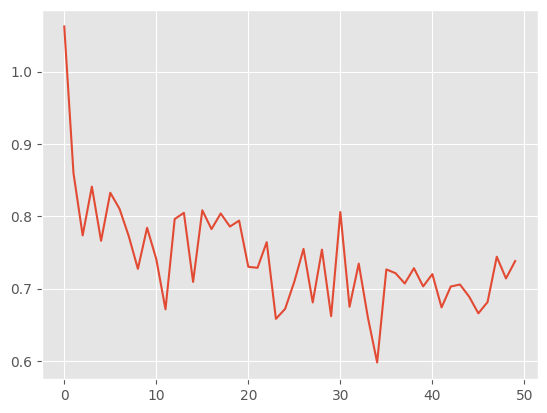

In [19]:
# Plot training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()